In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
ds = pd.read_csv("iris.csv")
ds.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [14]:
ds.drop(columns = ["Id", "Species"], inplace = True)

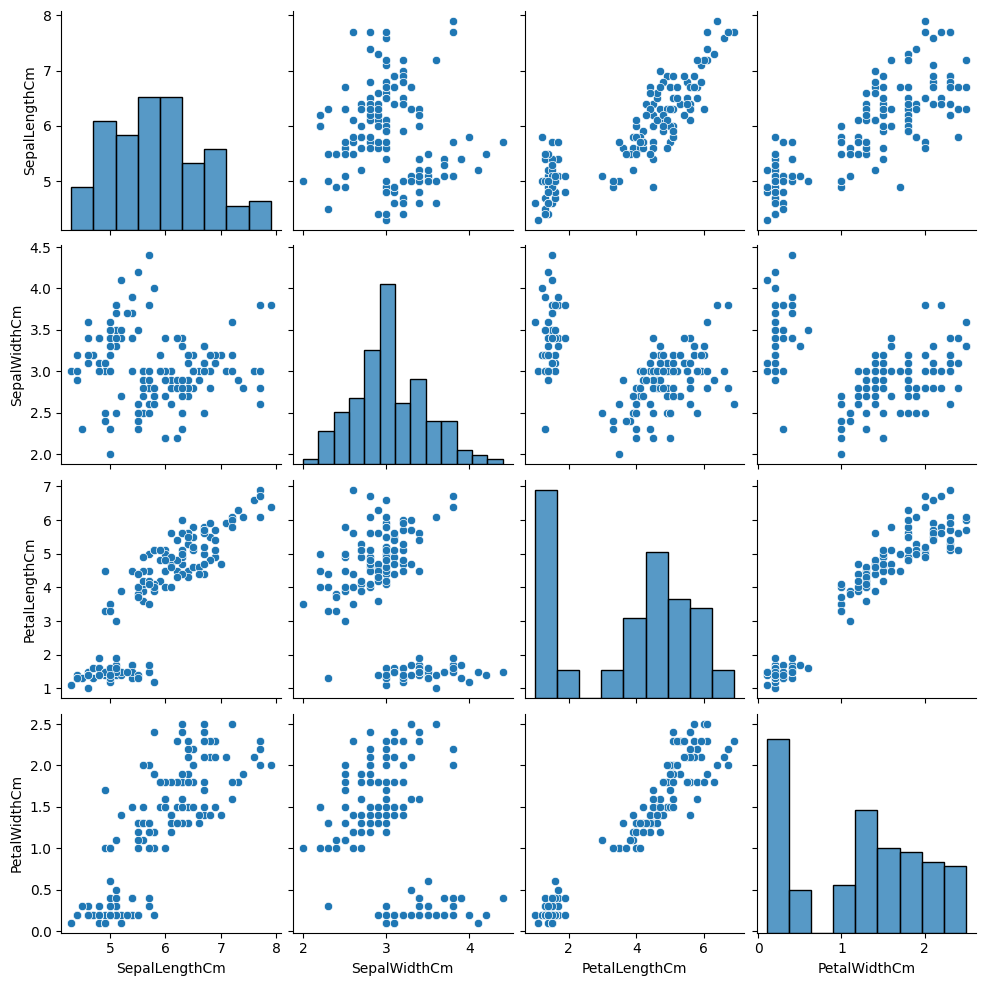

In [15]:
sns.pairplot(data = ds)
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for i in range(2,21):
    km = KMeans( n_clusters=i, init='k-means++')
    km.fit(ds)
    wcss.append(km.inertia_)
    

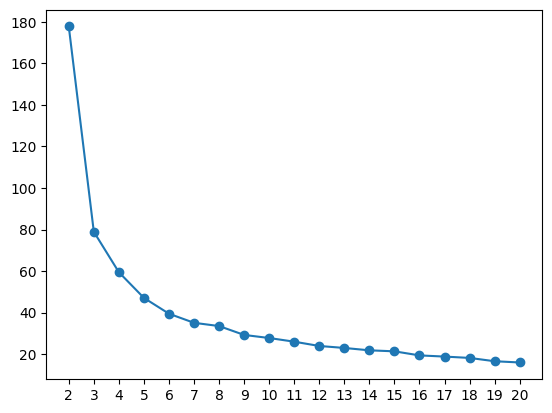

In [36]:
plt.plot([i for i in range(2,21)], wcss, marker = 'o')
plt.xticks([i for i in range(2,21)])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

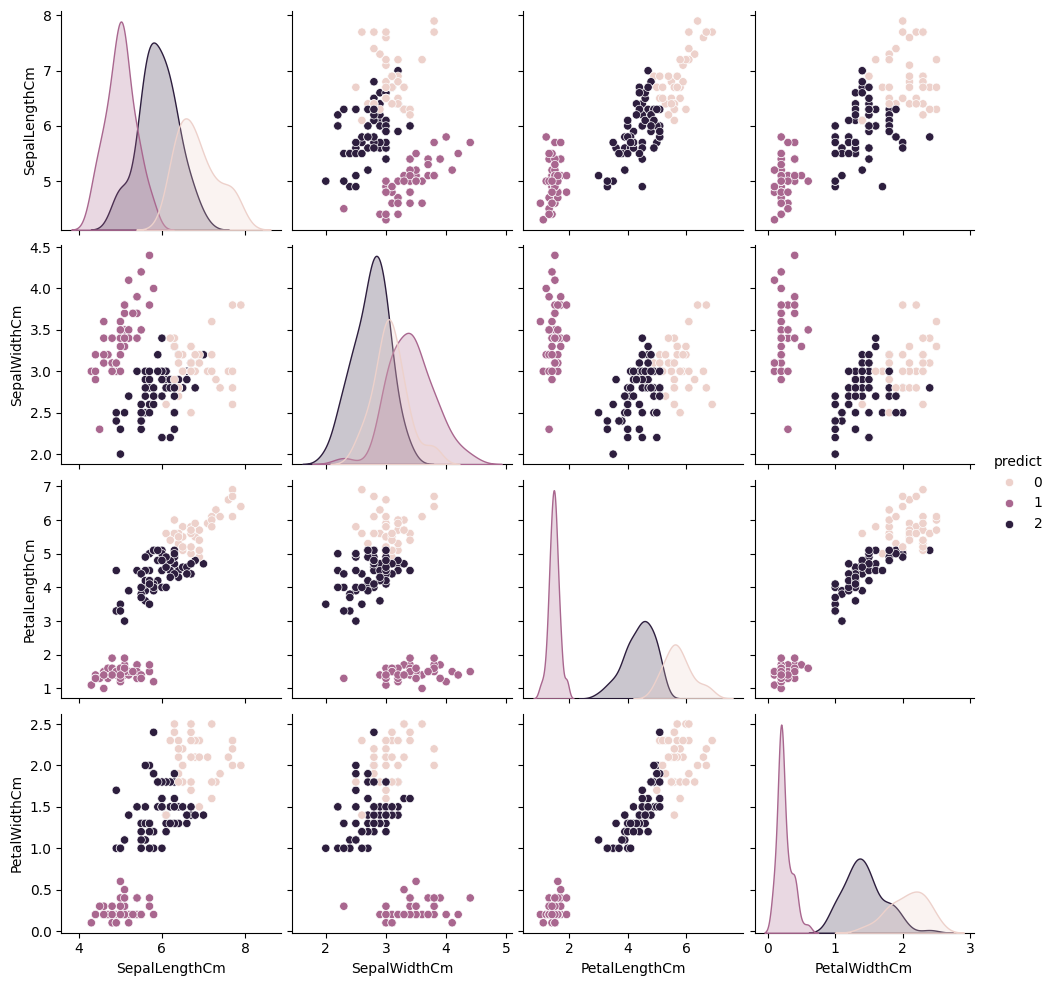

In [37]:
kmn = KMeans(n_clusters = 3)
ds["predict"] = kmn.fit_predict(ds)
sns.pairplot(data = ds, hue = 'predict')
plt.show

In [29]:
org_data = pd.read_csv("iris.csv")


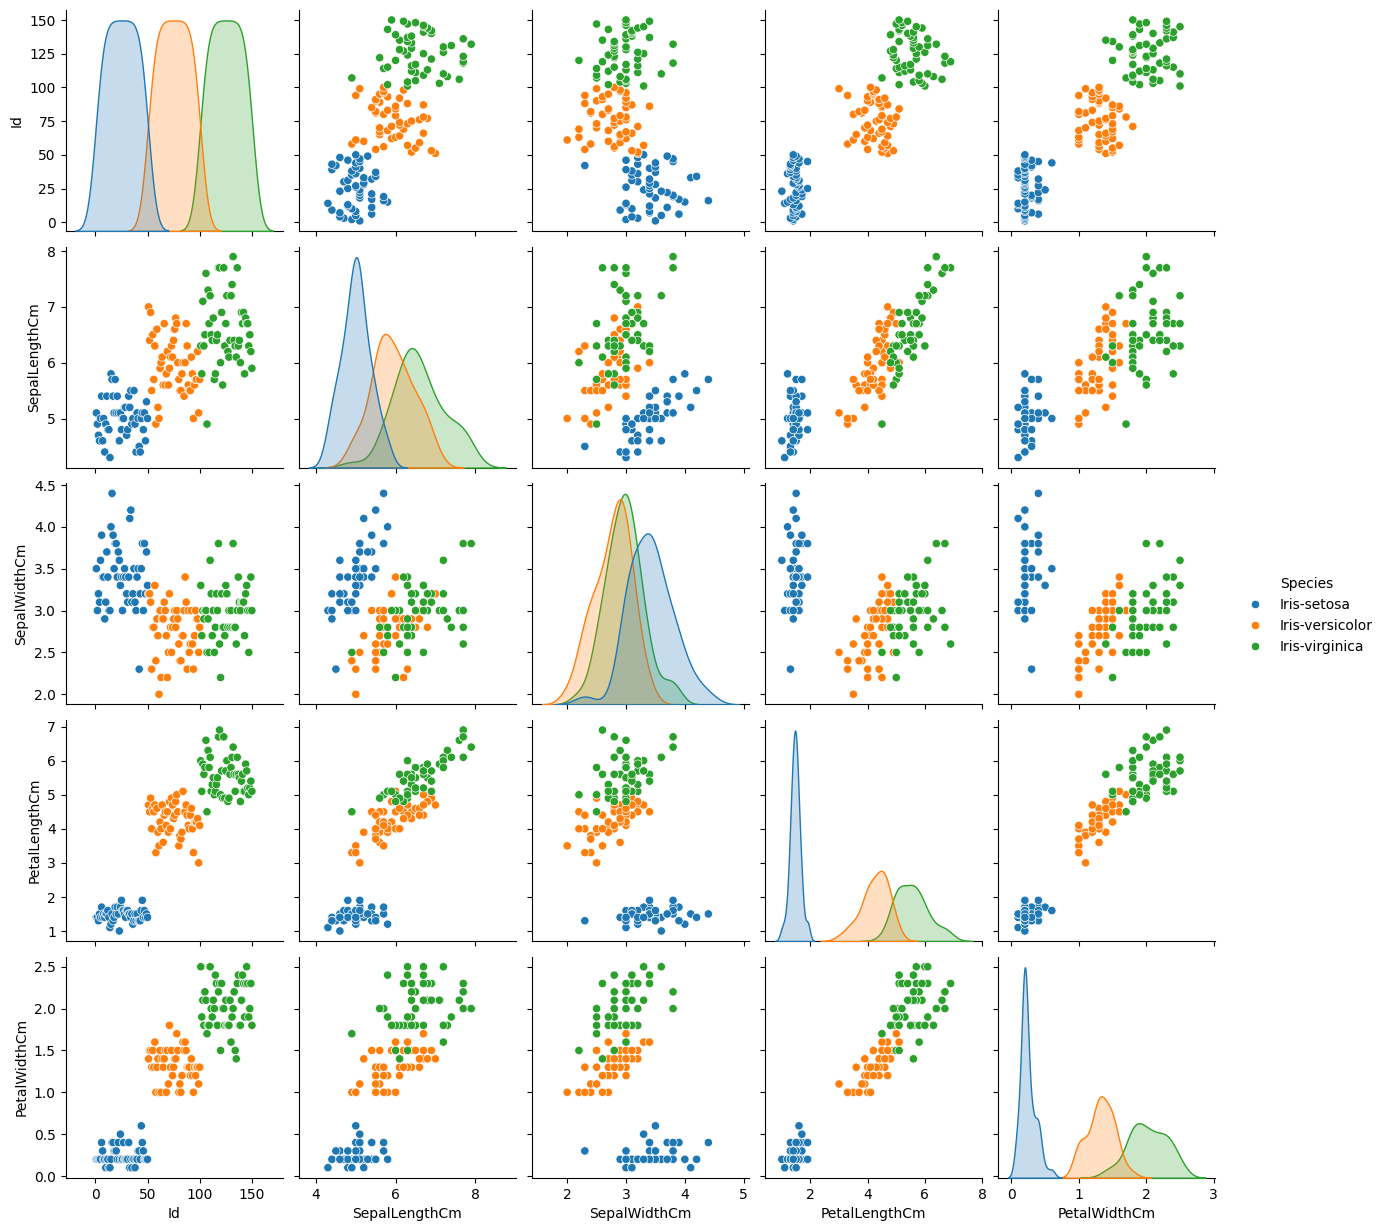

In [31]:
sns.pairplot(data = org_data, hue = 'Species')
plt.show()


Hierarchical Cluster

In [38]:
#Agglomerative cluster

In [42]:
ds = pd.read_csv("iris.csv")
ds.drop(columns = ["Id","Species"], inplace = True)
ds.head(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


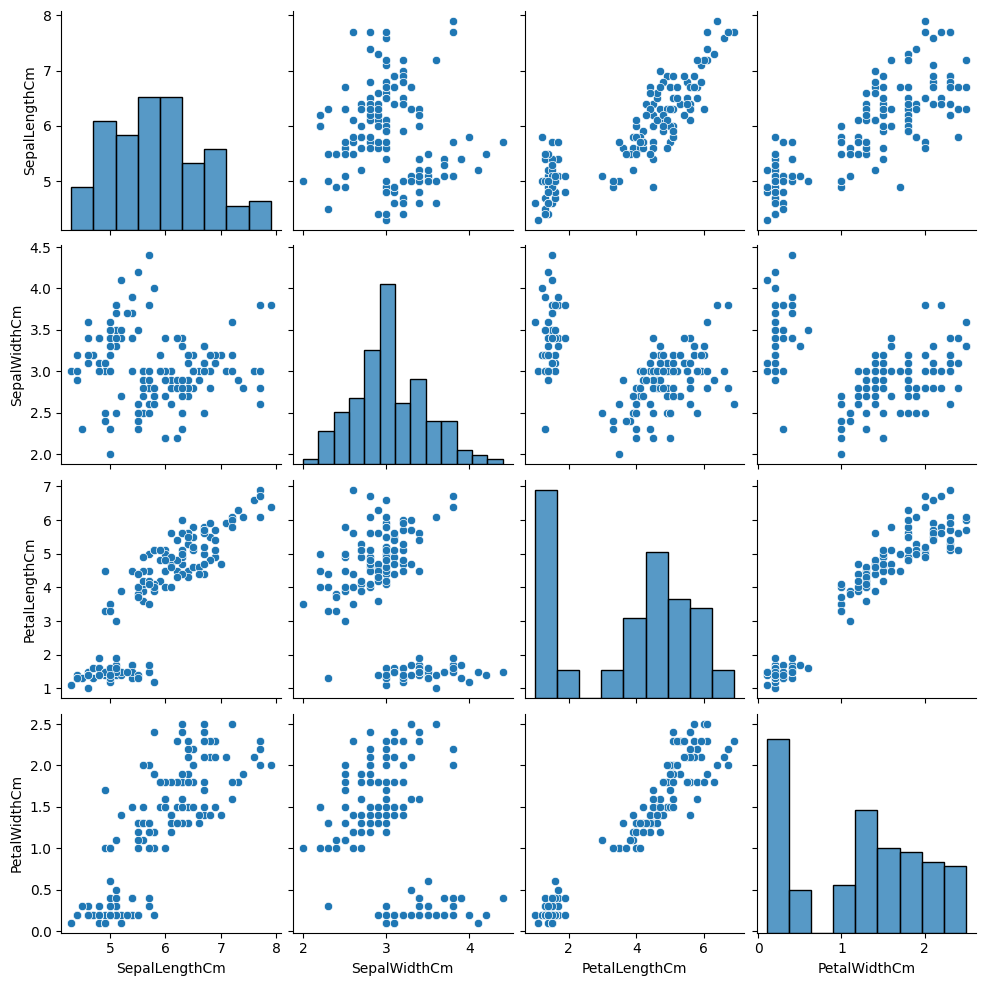

In [43]:
sns.pairplot(data = ds)
plt.show()

In [44]:
pip install SciPy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\inder\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [45]:
import scipy.cluster.hierarchy as sc

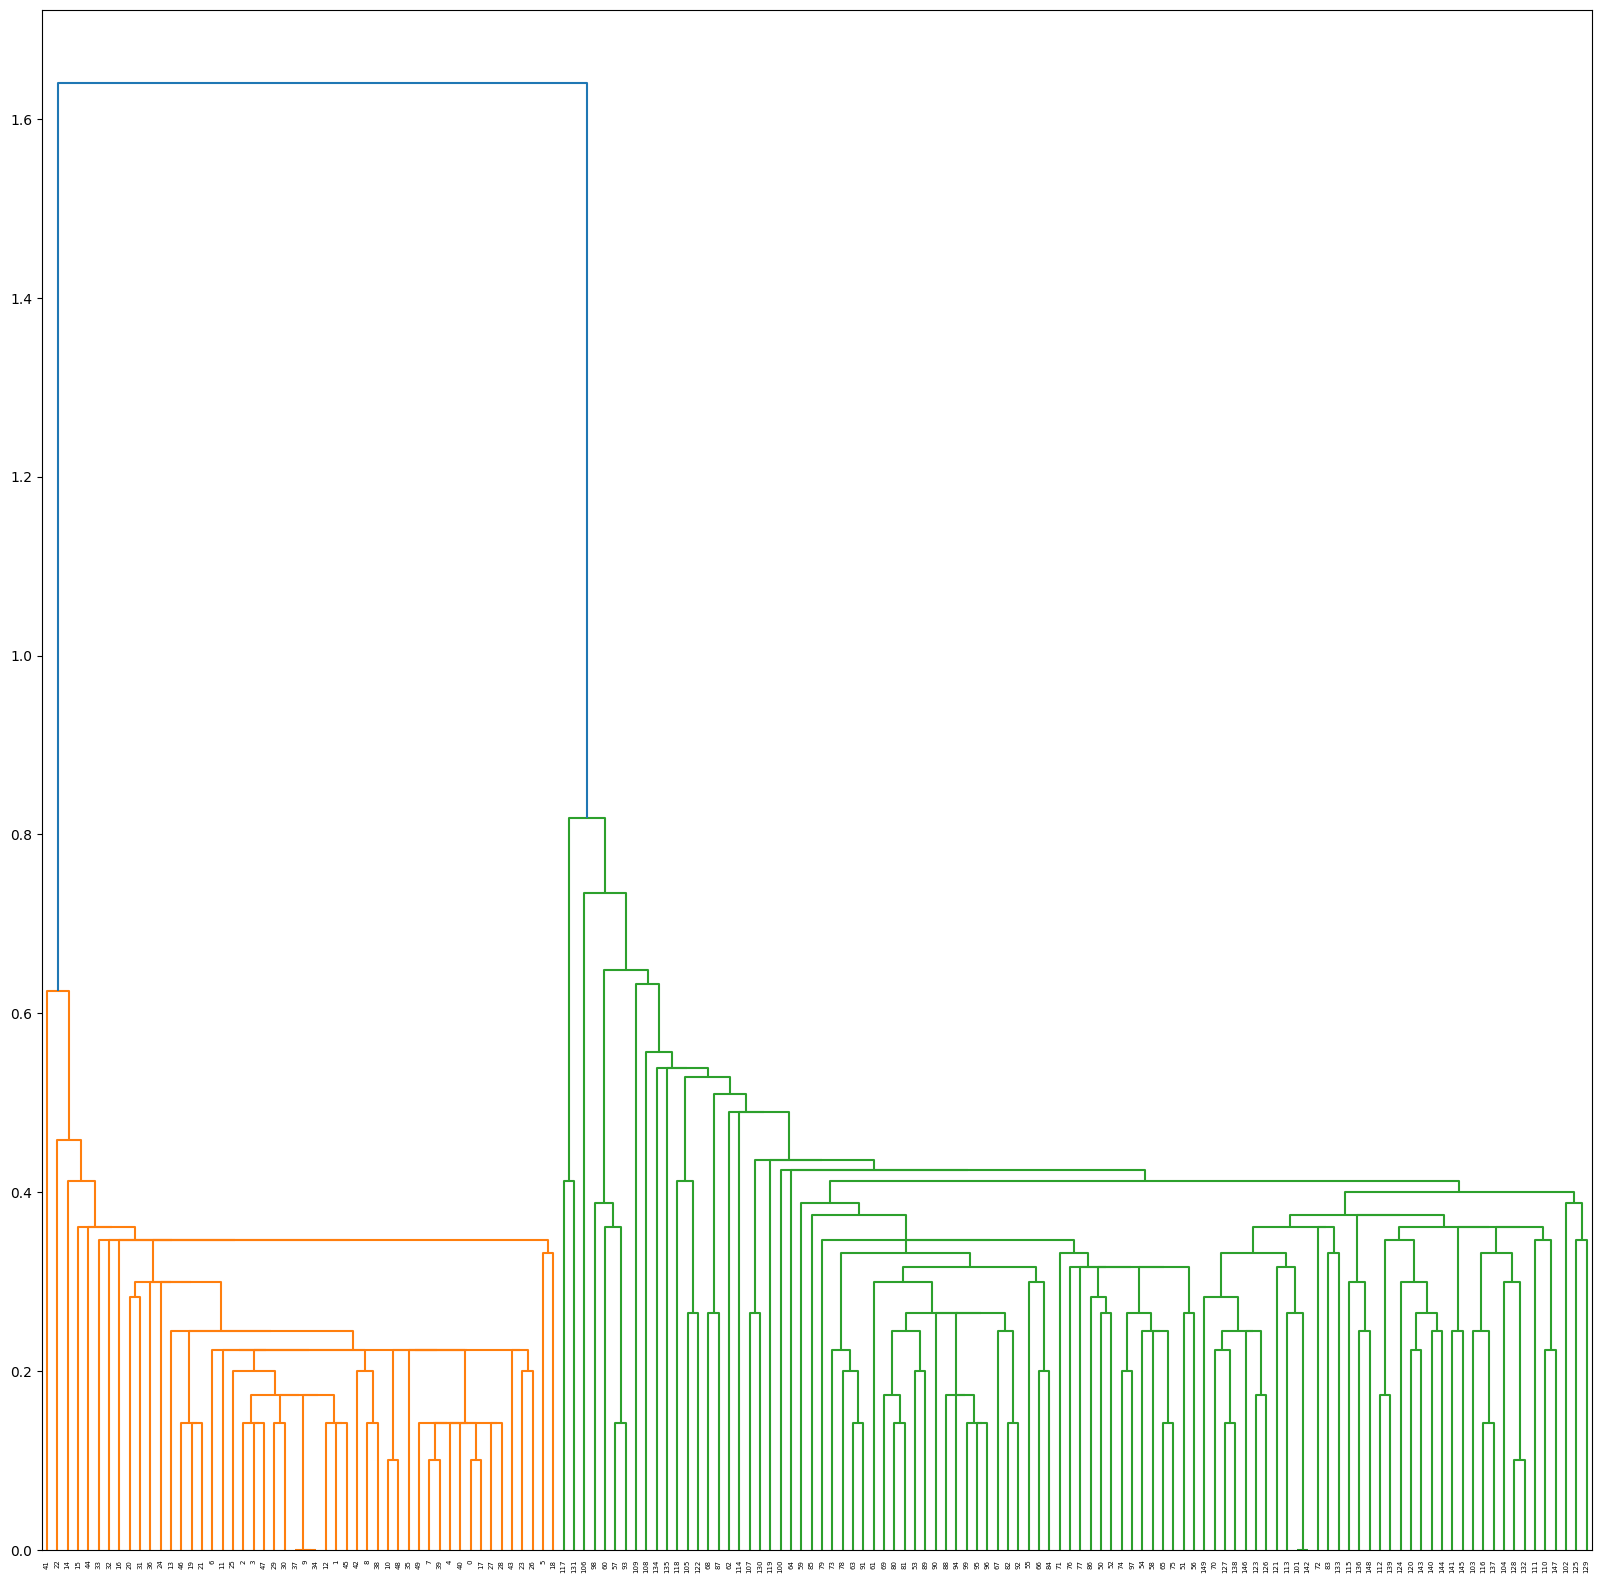

In [49]:
plt.figure(figsize = (20,20))
sc.dendrogram(sc.linkage(ds,method = 'single', metric = 'euclidean'))
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
ac = AgglomerativeClustering(n_clusters = 2, linkage='single')
ds['predict']= ac.fit_predict(ds)

In [52]:
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


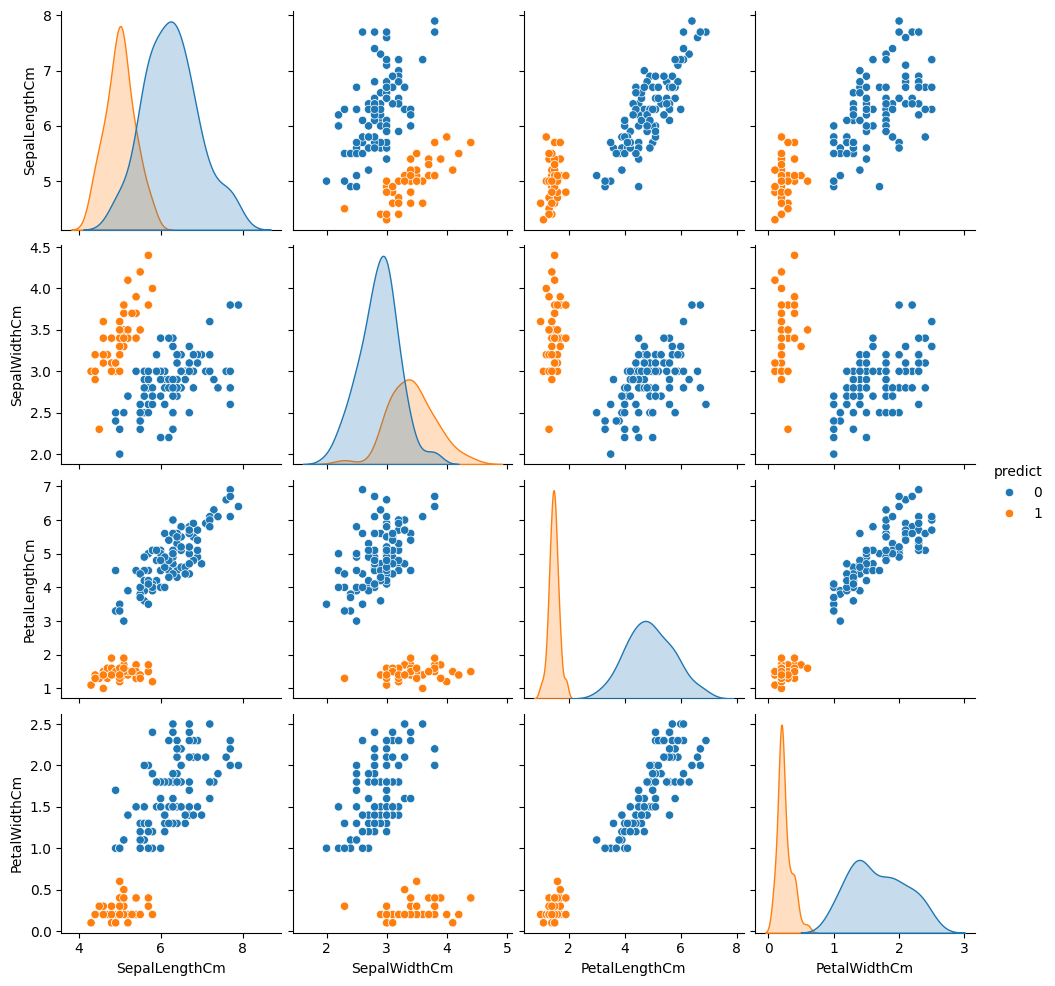

In [54]:
sns.pairplot(data = ds, hue = 'predict')
plt.show()

DBSCAN

In [2]:
from sklearn.datasets import make_moons

In [3]:
x,y = make_moons(n_samples=250, noise=0.5, random_state=42)

In [11]:
df = {"data1": x[:,0], "data2": x[:,1]}

In [12]:
dataset = pd.DataFrame(df)

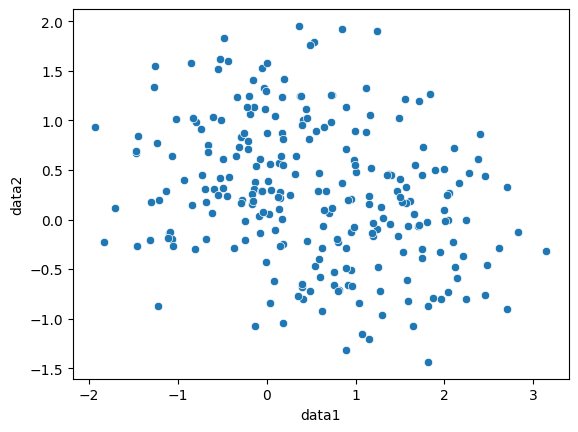

In [13]:
sns.scatterplot(x = "data1", y = 'data2', data = dataset)
plt.show()

In [14]:
from sklearn.cluster import DBSCAN

In [17]:
db = DBSCAN(eps=0.2,min_samples = 5)
dataset["predict"]= db.fit_predict(dataset)

In [18]:
dataset

,data1,data2,predict
0,0.019596,0.390993,0
1,1.612939,0.184252,1
2,-0.190412,1.068601,2
3,0.153474,0.276975,0
4,-1.467995,0.669983,-1
...,...,...,...
245,-1.211514,0.192700,-1
246,1.147172,0.152661,6
247,-1.306439,0.175115,-1
248,1.067584,-1.158886,-1


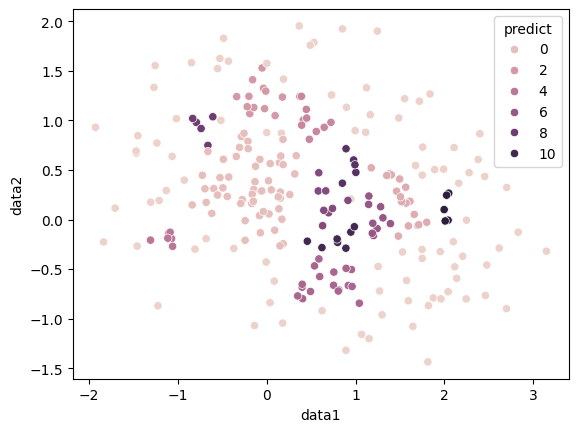

In [19]:
sns.scatterplot(x = "data1", y = 'data2', data = dataset, hue = 'predict')
plt.show()

Silhouette score

In [20]:
ds = pd.read_csv("iris.csv")


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [22]:
ds.drop(columns = ["Id", "Species"], inplace = True)

In [23]:
ds.head(4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(ds)
    wcss.append(km.inertia_)

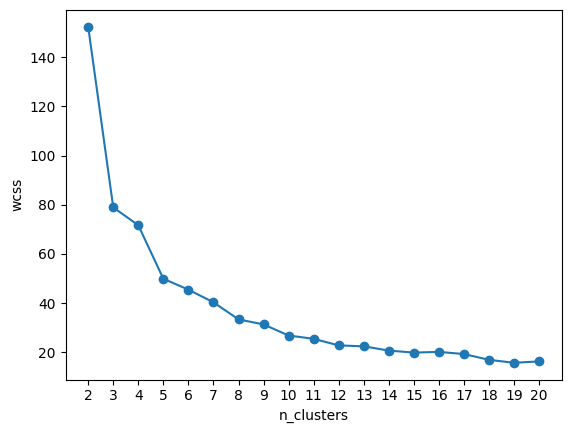

In [40]:
plt.plot([i for i in range(2,21)], wcss, marker = 'o')
plt.xticks([i for i in range(2,21)])
plt.xlabel("n_clusters")
plt.ylabel("wcss")
plt.show()

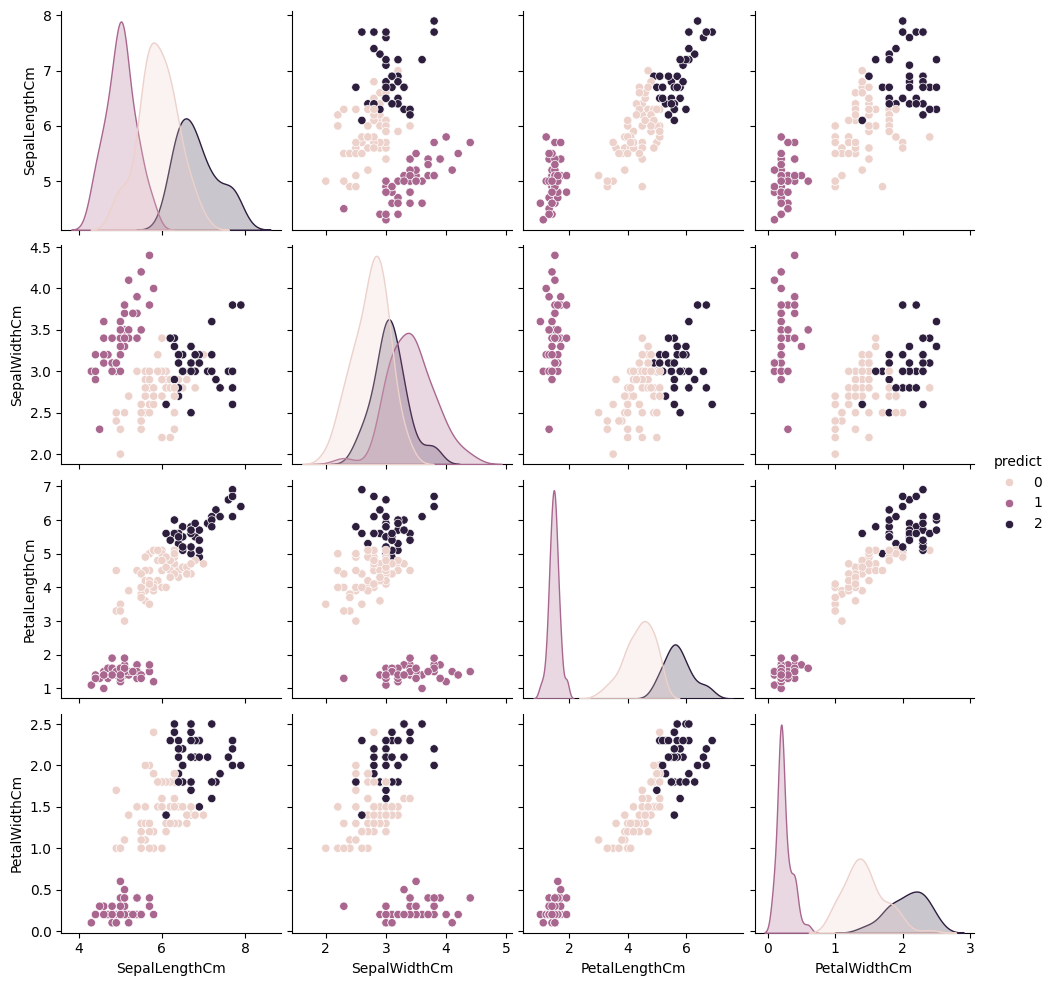

In [41]:
kmn = KMeans(n_clusters = 3)
ds["predict"] = kmn.fit_predict(ds)
sns.pairplot(data = ds, hue = "predict")
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [34]:
# ss = silhouette_score(ds, labels = kmn.labels_)

In [45]:
ss = []
no_cluster = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters = i)
    km1.fit(ds)
    ss.append(silhouette_score(ds, labels = kmn.labels_))

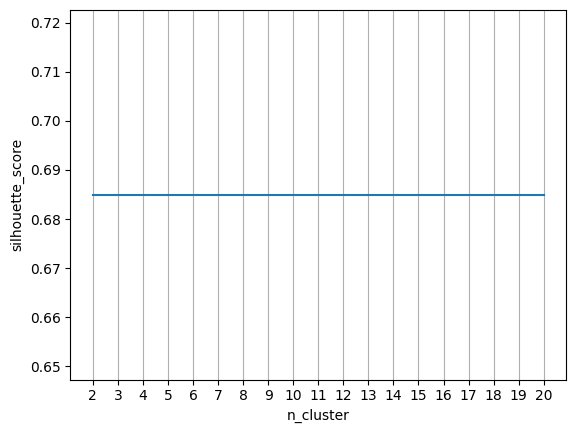

In [48]:
plt.plot(no_cluster, ss)
plt.xlabel("n_cluster")
plt.ylabel('silhouette_score')
plt.xticks(no_cluster)
plt.grid(axis = 'x')
plt.show()

In [51]:
pd.set_option("display.max_rows",500)

Association Rule Learning

In [53]:
#apriori Algorithm
ds = pd.read_csv("groceries - groceries.csv")
ds.head(8)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ds.columns

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')

In [7]:
ds["Item 5"][0]

nan

In [17]:
market = []
for i in range(0, ds.shape[0]):
    cus = []
    for j in ds.columns:
        if(type(ds[j][i]) == str):
            cus.append(ds[j][i])
    market.append(cus)

In [24]:
l = []
for i in market:
    for j in i:
        l.append(j)
        

In [21]:
import collections

In [27]:
p = collections.Counter(l)

In [29]:
d = {"Item Name": p.keys(), "Values": p.values()}

In [62]:
# pd.DataFrame(d).sort_values(by= ["Values"], ascending = False)

In [36]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [43]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [44]:
# tr.transform(market)

In [45]:
dframe = pd.DataFrame(tr.transform(market), columns = tr.columns_)

In [46]:
dframe

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
from mlxtend.frequent_patterns import apriori, association_rules


In [52]:
apriori(dframe, min_support = 0.01, use_colnames = True,max_len=3).sort_values(by = ["support"])
                                                                              

,support,itemsets
199,0.010066,"(whole milk, hard cheese)"
212,0.010066,"(tropical fruit, napkins)"
236,0.010066,"(other vegetables, waffles)"
306,0.010066,"(curd, whole milk, yogurt)"
160,0.010066,"(curd, rolls/buns)"
190,0.010066,"(sausage, fruit/vegetable juice)"
178,0.010066,"(frankfurter, sausage)"
311,0.010168,"(pork, whole milk, other vegetables)"
177,0.010168,"(frankfurter, root vegetables)"
117,0.010168,"(brown bread, root vegetables)"


In [54]:
#Frequent pattern Growth algorithm
ds = pd.read_csv("groceries - groceries.csv")
ds.head(4)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
market_l = []
for i in range(0,ds.shape[0]):
    cus = []
    for j in ds.columns:
        if(type(ds[j][i]) == str):
            cus.append(ds[j][i])
    market.append(cus)

In [58]:
l = []
for i in market:
    for j in i:
        l.append(j)

In [59]:
import collections

In [61]:
p =collections.Counter(l)

Counter({'whole milk': 5026,
         'other vegetables': 3806,
         'rolls/buns': 3618,
         'soda': 3430,
         'yogurt': 2744,
         'bottled water': 2174,
         'root vegetables': 2144,
         'tropical fruit': 2064,
         'shopping bags': 1938,
         'sausage': 1848,
         'pastry': 1750,
         'citrus fruit': 1628,
         'bottled beer': 1584,
         'newspapers': 1570,
         'canned beer': 1528,
         'pip fruit': 1488,
         'fruit/vegetable juice': 1422,
         'whipped/sour cream': 1410,
         'brown bread': 1276,
         'domestic eggs': 1248,
         'frankfurter': 1160,
         'margarine': 1152,
         'coffee': 1142,
         'pork': 1134,
         'butter': 1090,
         'curd': 1048,
         'beef': 1032,
         'napkins': 1030,
         'chocolate': 976,
         'frozen vegetables': 946,
         'chicken': 844,
         'white bread': 828,
         'cream cheese': 780,
         'waffles': 756,
         'salty

In [63]:
d = {"Item_name": p.keys(), "Values": p.values()}

In [64]:
 pd.DataFrame(d).sort_values(by= ["Values"], ascending = False)

,Item_name,Values
7,whole milk,2513
11,other vegetables,1903
17,rolls/buns,1809
31,soda,1715
5,yogurt,1372
24,bottled water,1087
42,root vegetables,1072
4,tropical fruit,1032
52,shopping bags,969
50,sausage,924


In [66]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [67]:
te = TransactionEncoder()
te.fit(market)

TransactionEncoder()

In [70]:
df = pd.DataFrame(te.transform(market), columns = tr.columns_)

In [71]:
from mlxtend.frequent_patterns import fpgrowth

In [74]:
fpgrowth(df, min_support = 0.07, use_colnames = True, max_len = 3).sort_values(by= ["support"])

,support,itemsets
17,0.071683,(whipped/sour cream)
11,0.072293,(fruit/vegetable juice)
18,0.074835,"(other vegetables, whole milk)"
4,0.075648,(pip fruit)
14,0.077682,(canned beer)
10,0.079817,(newspapers)
7,0.080529,(bottled beer)
0,0.082766,(citrus fruit)
12,0.088968,(pastry)
15,0.093950,(sausage)
